# **Binary Classification on IRIS dataset-**

# **Importing the packages-**

In [104]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import seaborn as sns
import plotly.express as px

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [105]:
#Get the data from the web 
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [106]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**check for null/missing values**

In [107]:
#check for null/missing values
df.info()
import missingno as msno
# msno.bar(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**saving the values as X and y**

In [108]:
data = iris
X, y = data['data'], data['target']
print(X.shape)

(150, 4)


**Removing the class 2 for binary classification, better visualisation and understanding**

In [109]:
X = pd.DataFrame(X[np.where(y!=2)])  
y = pd.DataFrame(y[np.where(y!=2)])
print(X.shape)

(100, 4)


In [110]:
#Converting to a dataframe for better preprocessing
df = pd.concat([X, y], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [111]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [112]:
df.describe().loc[['min', 'max']].T

,min,max
sepal_length,4.3,7.0
sepal_width,2.0,4.4
petal_length,1.0,5.1
petal_width,0.1,1.8
target,0.0,1.0


**Making the train-test split-**

In [113]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, random_state=0)

**Feature scaling-**

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [115]:
X_train = scaler.fit_transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

**Grid search CV for hyper-parameter selection-**

In [117]:
from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV #for validating hyperparameters

In [118]:
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #choose how many subsets to create
parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             verbose=1)

In [119]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
# int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
int_cols = ["param_C", "param_kernel", "mean_test_score"]
scores[int_cols].head() # only look at the first 5

,param_C,param_kernel,mean_test_score
rank_test_score,,,
1,0.01,linear,1.0
1,0.1,linear,1.0
1,1,linear,1.0
1,10,linear,1.0
1,100,linear,1.0


In [120]:
#finally I use the best values of the newly found hyperparameters to train the entire original training set, 
#evaluating its accuracy on the test set, whose data results as 'unseen'

from sklearn.metrics import accuracy_score as accuracy #accuracy metric
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)
round(accuracy(y_test, predictions), 3) #evaluation

1.0

#Performance Metrics

##Precision 

TP/(TP+FP)

##Recall

TP/(TP+FN)

##$F_\beta$ Score

$(1+\beta^2) \frac{\text{precision}\cdot\text{recall}}{(\beta^2 \cdot \text{precision})+\text{recall}}$

#Multi-class classification metrics 

For multiple classes, for each class $c \in \{1,2,\ldots,K\}$ considering the samples belonging to class $c$ labeled as $+1$ and samples beloning to all other classes $c^\prime \neq c$ labeled as $-1$, we can compute the following quantities:


*   True positives for class $c$ as $TP_c$
*   False positives for class $c$ as $FP_c$
*   False negatives for class $c$ as $FN_c$

Using these quantities, we can compute 

*   precision as $P_c$
*   recall as $R_c$

By macro-averaged precision, we simply compute $\frac{\sum_{c=1}^{K} P_c }{K}$.

Similarly, by macro-averaged recall, we simply compute $\frac{\sum_{c=1}^{K} R_c }{K}$.

In micro-averaged precision, we compute $\frac{\sum_{c=1}^{K} TP_c }{\sum_{c=1}^{K} (TP_c + FP_c)}$.

And in micro-averaged recall, we compute $\frac{\sum_{c=1}^{K} TP_c }{\sum_{c=1}^{K} (TP_c + FN_c)}$.











In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        20
   macro avg       0.67      0.67      0.67        20
weighted avg       1.00      1.00      1.00        20



In [122]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


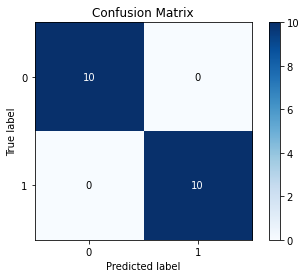

In [123]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

# **Visualising the Decision Boundary-**

In [124]:
#Dropping these two columns for better visualization puposes
#df.drop(['petal_length', 'petal_width'], axis=1)
df.drop(['sepal_length', 'sepal_width'], axis=1)

,petal_length,petal_width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [125]:
#We are taking complete data as training data as purpose is just to visualize and understand things better
#X_train = np.array(df[["sepal_width","sepal_length"]])
X_train = np.array(df[["petal_width","petal_length"]])
y_train = np.array(df["target"])

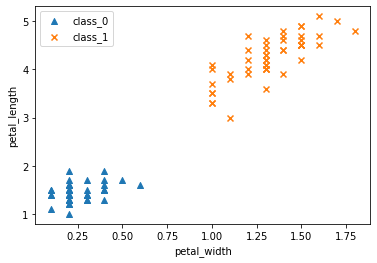

In [126]:
#Visualizing the features of data correspponding to their respective classes
#plt.scatter(df[['sepal_width']][:50],df[["sepal_length"]][:50], marker = '^')
#plt.scatter(df[["sepal_width"]][51:], df[["sepal_length"]][51:], marker = 'x')

plt.scatter(df[['petal_width']][:50],df[["petal_length"]][:50], marker = '^')
plt.scatter(df[["petal_width"]][51:], df[["petal_length"]][51:], marker = 'x')

plt.legend(['class_0', "class_1"])
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

In [127]:
#Training the Support Vector Classifier
from sklearn import svm
clf = svm.SVC(C=1.0, kernel = "linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

Text(0.5, 1.0, 'decision boundary with training points')

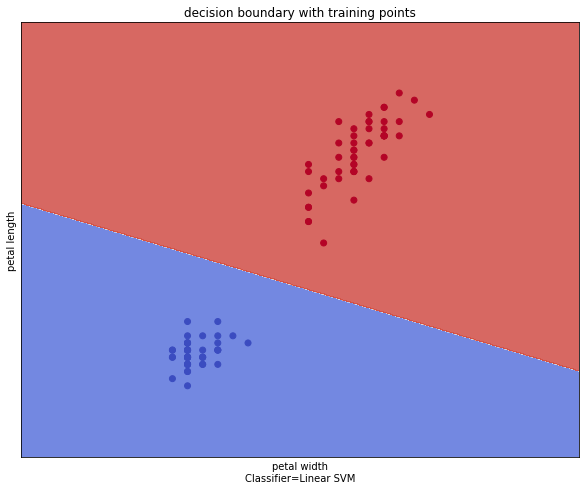

In [128]:
#set up range for the 2 coordinates
h=0.01 #mesh step size
x1_min, x1_max = X_train[:, 0].min()-1 , X_train[:, 0].max()+1 
x2_min, x2_max = X_train[:, 1].min()-1 , X_train[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                    np.arange(x2_min, x2_max, h))


pred = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) #np.c_ concatenates along columns
# Put the result into a color plot
pred = pred.reshape(xx1.shape)


fig, (ax1) = plt.subplots(1,1, figsize=(10,8))
#print(xx1.shape,xx2.shape,pred.shape)
ax1.contourf(xx1, xx2, pred, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
ax1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
xlabel = 'petal width' + str('\n')+'Classifier=Linear SVM'
ax1.set_xlabel(xlabel)
ax1.set_ylabel('petal length')
ax1.set_xlim(xx1.min(), xx1.max())
ax1.set_ylim(xx2.min(), xx2.max())
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_title('decision boundary with training points')



In [129]:
#Printing some important information
print('w = ',clf.coef_)
print('b = ',clf.intercept_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)

w =  [[0.7 1.1]]
b =  [-3.27999997]
Support vectors =  [[0.4 1.9]
 [1.1 3. ]]
Number of support vectors for each class =  [1 1]


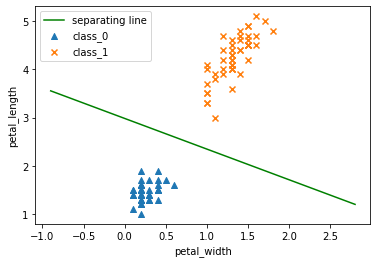

In [130]:
#Visualizing the line that separates the two classes
plt.scatter(df[['petal_width']][:50],df[["petal_length"]][:50], marker = '^')
plt.scatter(df[["petal_width"]][51:], df[["petal_length"]][51:], marker = 'x')
# plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker = 'o', color = 'r')
#X1 = np.linspace(2,4.5)
X1=np.linspace(x1_min,x1_max)
X2 = (-clf.intercept_-clf.coef_[0][0]*X1)/clf.coef_[0][1]
plt.plot(X1, X2, color = 'g')


plt.legend(["separating line",'class_0', "class_1"])
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

In [131]:
#print(clf.support_vectors_[0])
#print(clf.coef_)
new_intercept_below = -(np.dot(clf.support_vectors_[0],clf.coef_[0]) ) 
new_intercept_above = -(np.dot(clf.support_vectors_[1],clf.coef_[0]) ) 


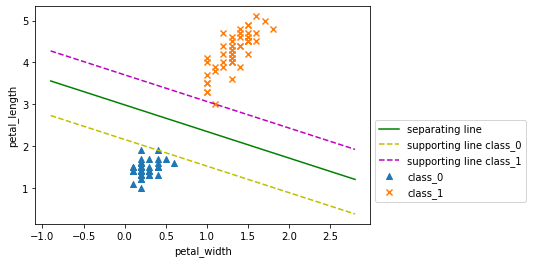

In [132]:
#Visualizing the line that separates the two classes
plt.scatter(df[['petal_width']][:50],df[["petal_length"]][:50], marker = '^')
plt.scatter(df[["petal_width"]][51:], df[["petal_length"]][51:], marker = 'x')
# plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker = 'o', color = 'r')
#X1 = np.linspace(2,4.5)
X1=np.linspace(x1_min,x1_max)
X2 = (-clf.intercept_-clf.coef_[0][0]*X1)/clf.coef_[0][1]
plt.plot(X1, X2, color = 'g')

X1=np.linspace(x1_min,x1_max)
X2 = (-new_intercept_below-clf.coef_[0][0]*X1)/clf.coef_[0][1]
plt.plot(X1, X2, color = 'y', linestyle='--')
X1=np.linspace(x1_min,x1_max)
X2 = (-new_intercept_above-clf.coef_[0][0]*X1)/clf.coef_[0][1]
plt.plot(X1, X2, color = 'm', linestyle='--')


plt.legend(["separating line", "supporting line class_0","supporting line class_1",'class_0', "class_1"],bbox_to_anchor=(1, 0.5))
plt.xlabel("petal_width")
plt.ylabel("petal_length")
plt.show()

In [133]:
# Calculating the unit vector of w and margin
w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))
margin = 1/np.sqrt(np.sum(clf.coef_[0]**2))

In [134]:
#Calculating all the parameters margin lines
X1=np.linspace(x1_min,x1_max)
X2 = (-clf.intercept_-clf.coef_[0][0]*X1)/clf.coef_[0][1]

X2_below = X2 - w_hat[1] * margin
X2_above = X2 + w_hat[1] * margin
#decision_boundary_points = np.array(list(zip(X1, X2)))

points_of_line_above = np.array(list(zip(X1, X2_above))) #decision_boundary_points + w_hat * margin
points_of_line_below = np.array(list(zip(X1, X2_below)))#decision_boundary_points - w_hat * margin

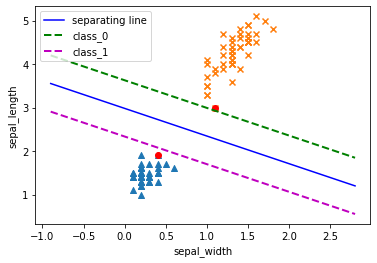

In [135]:
#Visualizing the line that separates the two classes
plt.scatter(df[['petal_width']][:50],df[["petal_length"]][:50], marker = '^')
plt.scatter(df[["petal_width"]][51:], df[["petal_length"]][51:], marker = 'x')
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], marker = 'o', color = 'r')  #having a look atthe support vectors
#X1 = np.linspace(2,4.5)
X1=np.linspace(x1_min,x1_max)
X2 = (-clf.intercept_-clf.coef_[0][0]*X1)/clf.coef_[0][1]
plt.plot(X1, X2, color = 'blue')
# Green margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'g--', 
         linewidth=2)
# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'm--',
         linewidth=2)
plt.legend(["separating line",'class_0', "class_1"])
plt.xlabel("sepal_width")
plt.ylabel("sepal_length")
plt.show()